<a href="https://colab.research.google.com/github/setyo-dwi-pratama/webscraping-python/blob/main/Scraping_Film.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.dataquest.io/blog/web-scraping-beautifulsoup/

https://www.imdb.com/search/title/?release_date=2017&sort=num_votes,desc&page=1

In [5]:

from requests import get
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)

In [8]:
print(response.text[:500])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle",


In [9]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')

In [10]:
type(html_soup)

bs4.BeautifulSoup

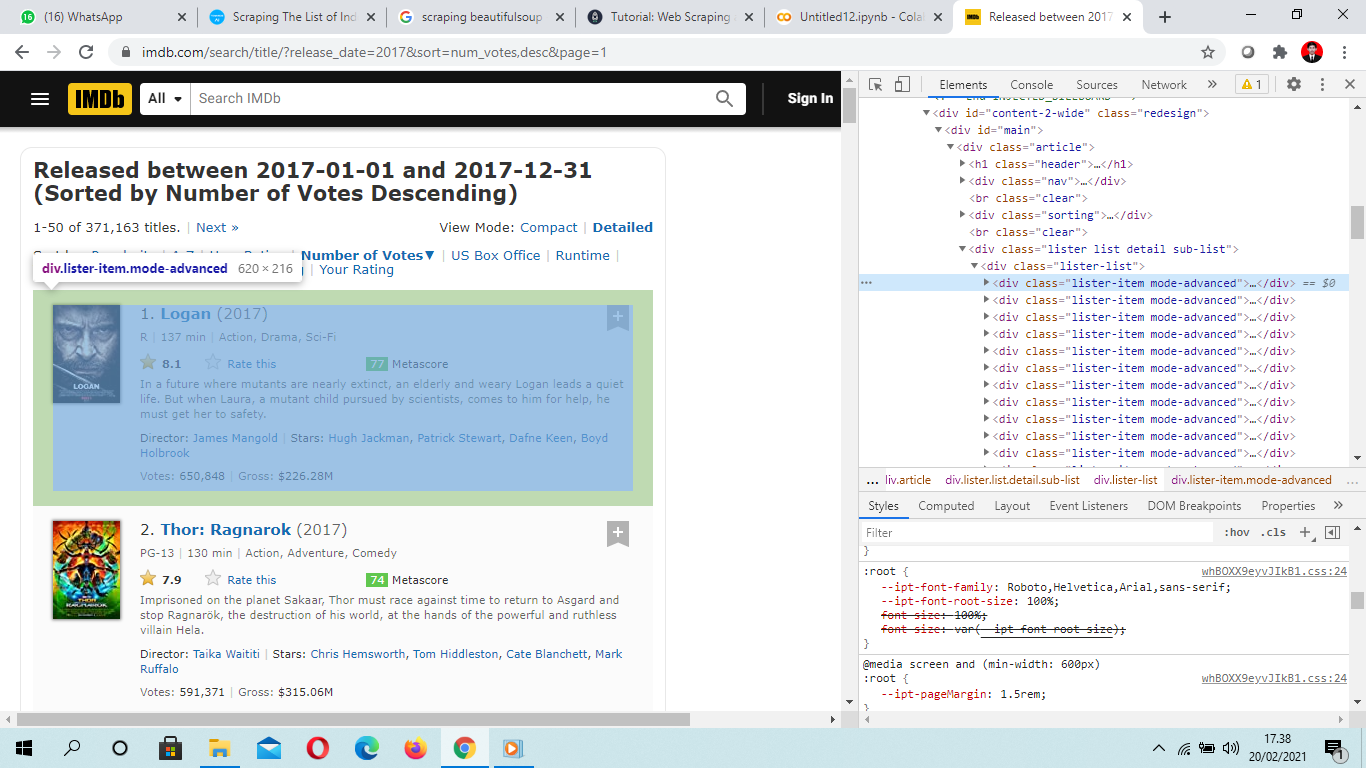

In [11]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


Now we’ll select only the first container, and extract, by turn, each item of interest:

The name of the movie.

The year of release.

The IMDB rating.

The Metascore.

The number of votes

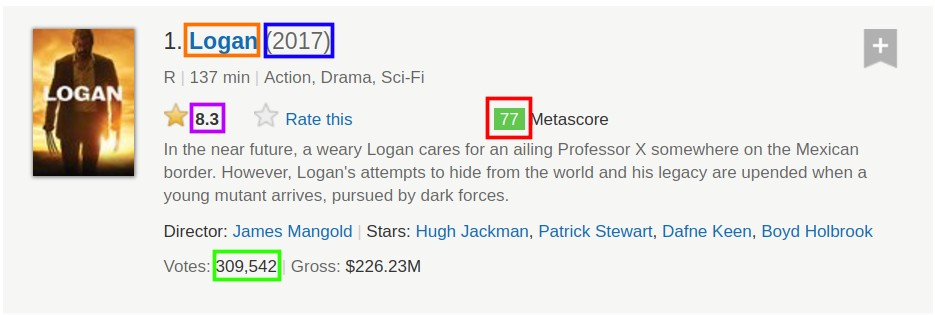

In [12]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted ">
<span class="certificate">R</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Drama, Sci-Fi            </span>


In [13]:
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [14]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [15]:
first_movie.h3.a

<a href="/title/tt3315342/">Logan</a>

In [16]:
first_name = first_movie.h3.a.text
first_name

'Logan'

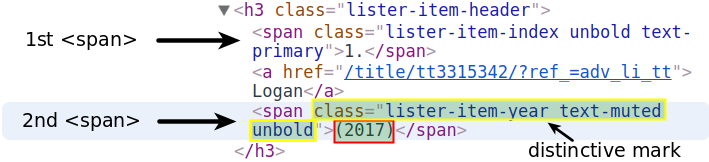

In [17]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2017)</span>

In [18]:
first_year = first_year.text
first_year

'(2017)'

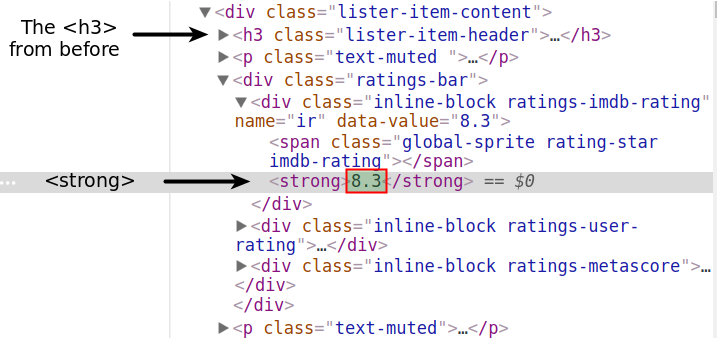

In [19]:
first_movie.strong

<strong>8.1</strong>

In [21]:
first_imdb = first_movie.strong.text
first_imdb

'8.1'

In [22]:
first_imdb = float(first_imdb)

In [23]:
first_imdb

8.1

In [24]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

77


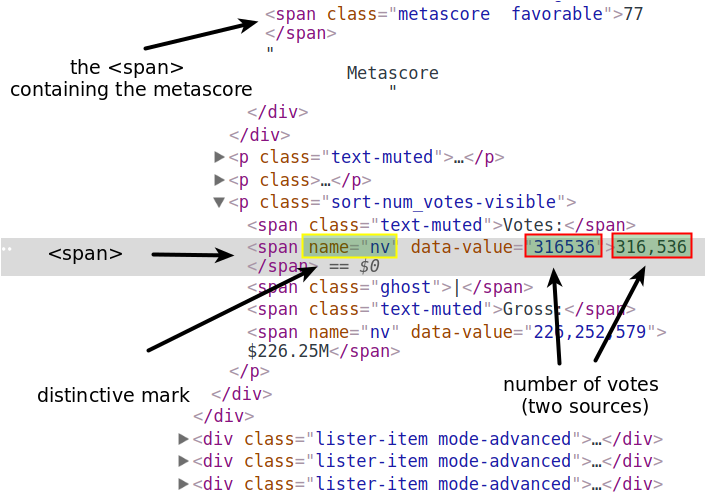

In [32]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="650848" name="nv">650,848</span>

In [33]:
first_votes['data-value']

'650848'

In [34]:
first_votes = int (first_votes['data-value'])
first_votes

650848

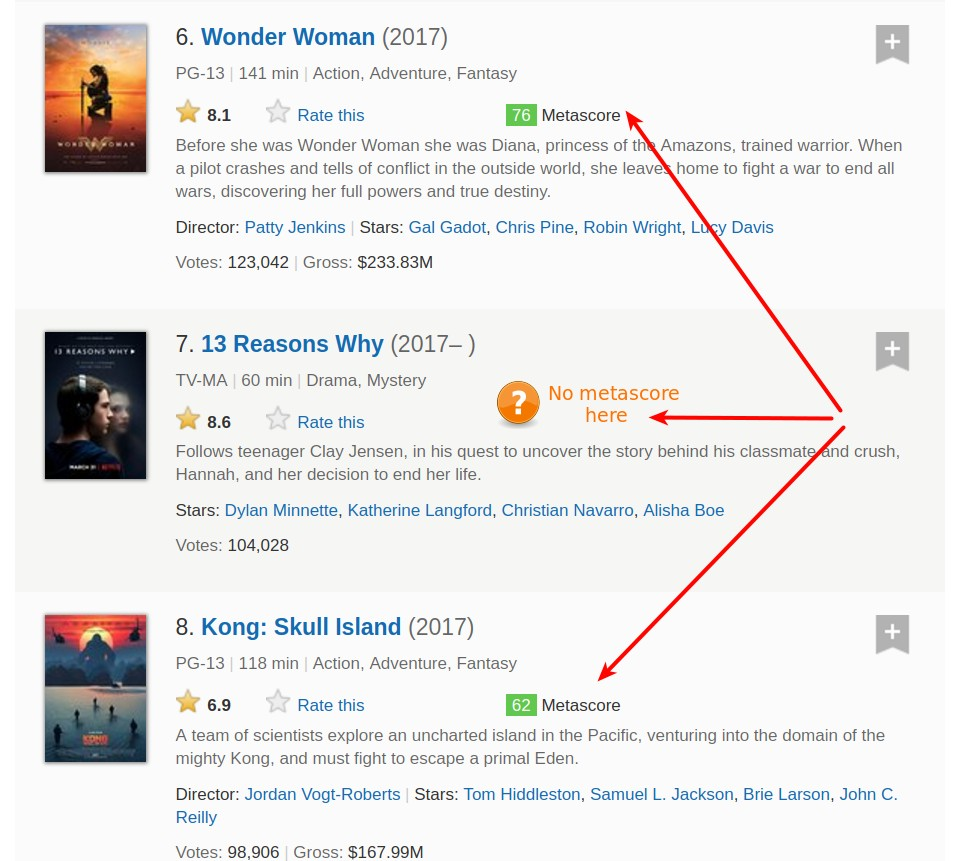

In [36]:
eighth_movie_mscore = movie_containers[7].find('div', class_ = 'ratings-metascore')
type(eighth_movie_mscore)

bs4.element.Tag

In [39]:
eighth_movie_mscore

<div class="inline-block ratings-metascore">
<span class="metascore favorable">85        </span>
        Metascore
            </div>

In [41]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
      name = container.h3.a.text
      names.append(name)
# The year
      year = container.h3.find('span', class_ = 'lister-item-year').text
      years.append(year)
# The IMDB rating
      imdb = float(container.strong.text)
      imdb_ratings.append(imdb)
# The Metascore
      m_score = container.find('span', class_ = 'metascore').text
      metascores.append(int(m_score))
# The number of votes
      vote = container.find('span', attrs = {'name':'nv'})['data-value']
      votes.append(int(vote))

In [42]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
                        'year': years,
                        'imdb': imdb_ratings,
                        'metascore': metascores,
                        'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      42 non-null     object 
 1   year       42 non-null     object 
 2   imdb       42 non-null     float64
 3   metascore  42 non-null     int64  
 4   votes      42 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,650848
1,Thor: Ragnarok,(2017),7.9,74,591371
2,Guardians of the Galaxy Vol. 2,(2017),7.6,67,572855
3,Wonder Woman,(2017),7.4,76,571474
4,Star Wars: Episode VIII - The Last Jedi,(2017),7.0,84,567303
5,Dunkirk,(2017),7.8,94,558249
6,Spider-Man: Homecoming,(2017),7.4,73,516109
7,Get Out,(I) (2017),7.7,85,495664
8,Blade Runner 2049,(2017),8.0,81,464555
9,It,(I) (2017),7.3,69,461311
